In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 비만의 환경적 요인
1. 비만: 비만 상태가 계속되면 인슐린이 혈당을 잘 낮추지 못하고, 췌장의 인슐린 분비능도 떨어져 당뇨병이 생긴다


2. 노화: 당뇨병은 중년 이후에 많이 발생하며, 연령이 높아질 수록 발병률이 높아진다.
3. 식생활: 탄수화물과 지방을 과다 섭취하면 체중이 늘고 당뇨병이 생긴다.
4. 운동 부족: 비만을 초래하고, 근육을 약화시키며, 저항력이 떨어진다.
5. 스트레스: 부신피질호르몬 분비를 늘린다.
6. 임신성 당뇨병: 4kg 이상의 아이를 출산한 병력이 있으면 임신성 당뇨병이 생길 가능성이 있다.
7. 고혈압: 보통 당뇨병과 동반된다.
8. 이상지질혈증: 보통 당뇨병과 동반된다. 고콜레스테롤혈증, 고중성지방혈증

#### diabetes _ 012 _ health _ indicators _ BRFSS2015.csv 
-235,680개의 data.

-0은 당뇨 없음 or 임산부, 1은 당뇨 전단계, 2는 당뇨.

-Feature 21개, 데이터 불균형 있음

#### diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv 
-70,692개의 data.

-0은 당뇨 없음, 1은 당뇨.

-Feature 21개, 데이터 불균형 없음

#### diabetes _ binary _ health _ indicators _ BRFSS2015.csv
-235,680개의 data. 

-0은 당뇨 없음, 1은 당뇨.

-Feature 21개, 데이터 불균형 있음

In [2]:
data = pd.read_csv('Data\diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df = pd.DataFrame(data)
# df['Age'] = df.apply(lambda x: 18 if x.Age == 1 else (x.Age*5+15), axis=1)

In [4]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## 주목해야할 Column

1. HighPB: 당뇨와 함께 나타나는 대표적인 질병

2. HighChol: 이상지질혈증

3. BMI: 당뇨병의 대표적인 원인

4. Smoker: 흡연이 당뇨의 원인은 아니다. 따라서 당뇨 예측에는 고려하지 않는다.

5. Stroke: 당뇨병 대표 합병증. 뇌졸중을 겪고나서 당뇨병임을 아는 경우도 있다고 한다.

6. HeartDiseaseorAttack: Stroke와 마찬가지.

7. PhysActivity: 신체적 활동은 당뇨병 예방 및 치료에 가장 중요한 요인 중 하나.

8. Fruits: 탄수화물 섭취가 많으면 당뇨에 걸릴 가능성이 높아진다.

9. Age: 중년 이후 당뇨병에 걸릴 확률이 높아진다.

In [5]:
x = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
x.shape, y.shape

((253680, 21), (253680,))

In [6]:
p = 1 - (np.count_nonzero(y)/x.shape[0])
print(f'Ratio of zeros: {p*100} %')

Ratio of zeros: 84.24116997792494 %


In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, random_state=1, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, random_state=1, train_size=0.5)

In [8]:
batch_size = 64
epochs = 30

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(21,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train,y_train,
                    validation_data = (x_test,y_test),
                    epochs = epochs,
                    batch_size = batch_size
                    )

Epoch 1/30
3171/3171 [==============================] - 16s 5ms/step - loss: 0.4292 - accuracy: 0.8436 - val_loss: 0.4062 - val_accuracy: 0.8467
Epoch 2/30
3171/3171 [==============================] - 15s 5ms/step - loss: 0.4094 - accuracy: 0.8461 - val_loss: 0.4083 - val_accuracy: 0.8469
Epoch 3/30
3171/3171 [==============================] - 17s 5ms/step - loss: 0.4060 - accuracy: 0.8468 - val_loss: 0.4041 - val_accuracy: 0.8472
Epoch 4/30
3171/3171 [==============================] - 16s 5ms/step - loss: 0.4039 - accuracy: 0.8469 - val_loss: 0.3992 - val_accuracy: 0.8492
Epoch 5/30
3171/3171 [==============================] - 16s 5ms/step - loss: 0.4023 - accuracy: 0.8475 - val_loss: 0.3982 - val_accuracy: 0.8481
Epoch 6/30
3171/3171 [==============================] - 16s 5ms/step - loss: 0.4012 - accuracy: 0.8476 - val_loss: 0.4012 - val_accuracy: 0.8475
Epoch 7/30
3171/3171 [==============================] - 16s 5ms/step - loss: 0.4000 - accuracy: 0.8478 - val_loss: 0.3958 - val_ac

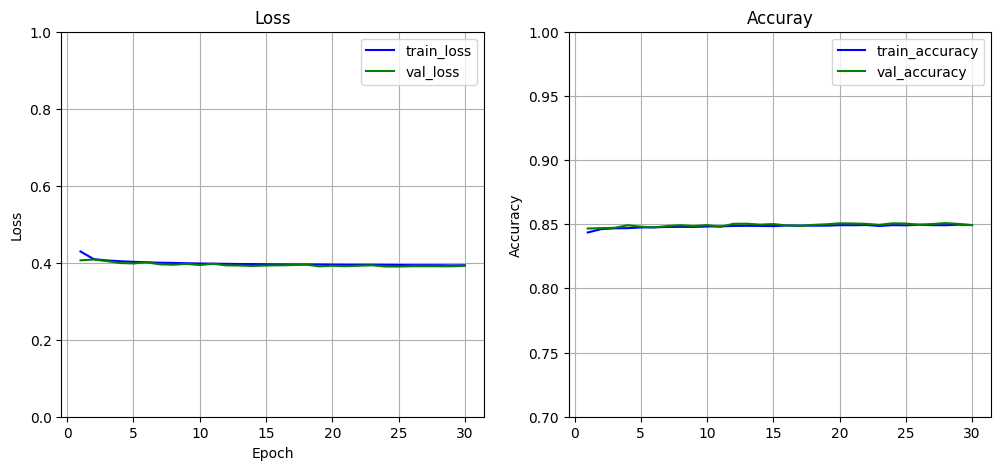

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
y_out = model.predict(x_valid)
y_h = np.argmax(y_out, axis=1)
y_valid = y_valid.astype(np.int64)
cnt = 0

for i in range(y_h.shape[0]):
    if y_h[i] == y_valid[i]:
        cnt += 1

print(f'Validation_accuracy = {cnt/25368 * 100} %')

Validation_accuracy = 84.89829706717124 %
